In [1]:
import os
import pandas as pd
import numpy as np

from database_processing_functions import *
from create_data_matrix import *


ModuleNotFoundError: No module named 'seaborn'

Have  13 crosses by zero
ar     0.181818
lrr    0.304296
srr    0.010831
alr    0.058293
sdr    0.353261
smr    0.429439
Name: 0, dtype: object


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

Have  13 crosses by zero
lrr           0.288749
srr           0.010579
alr           0.055613
sdr           0.353261
smr           0.528389
stiff_type         1.0
Name: 1, dtype: object


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

Have  15 crosses by zero
lrr           0.298894
srr           0.011766
alr           0.057258
sdr           0.353261
smr            0.36901
stiff_type         1.0
Name: 2, dtype: object


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

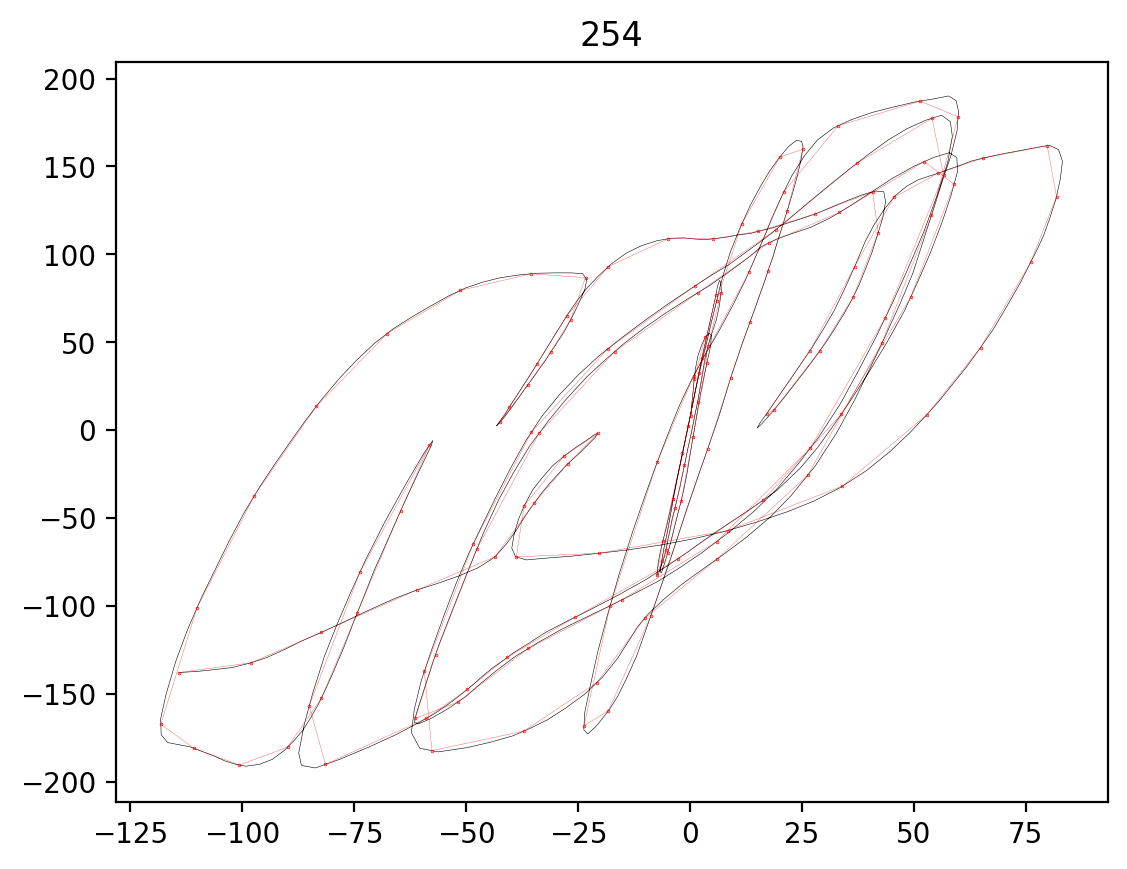

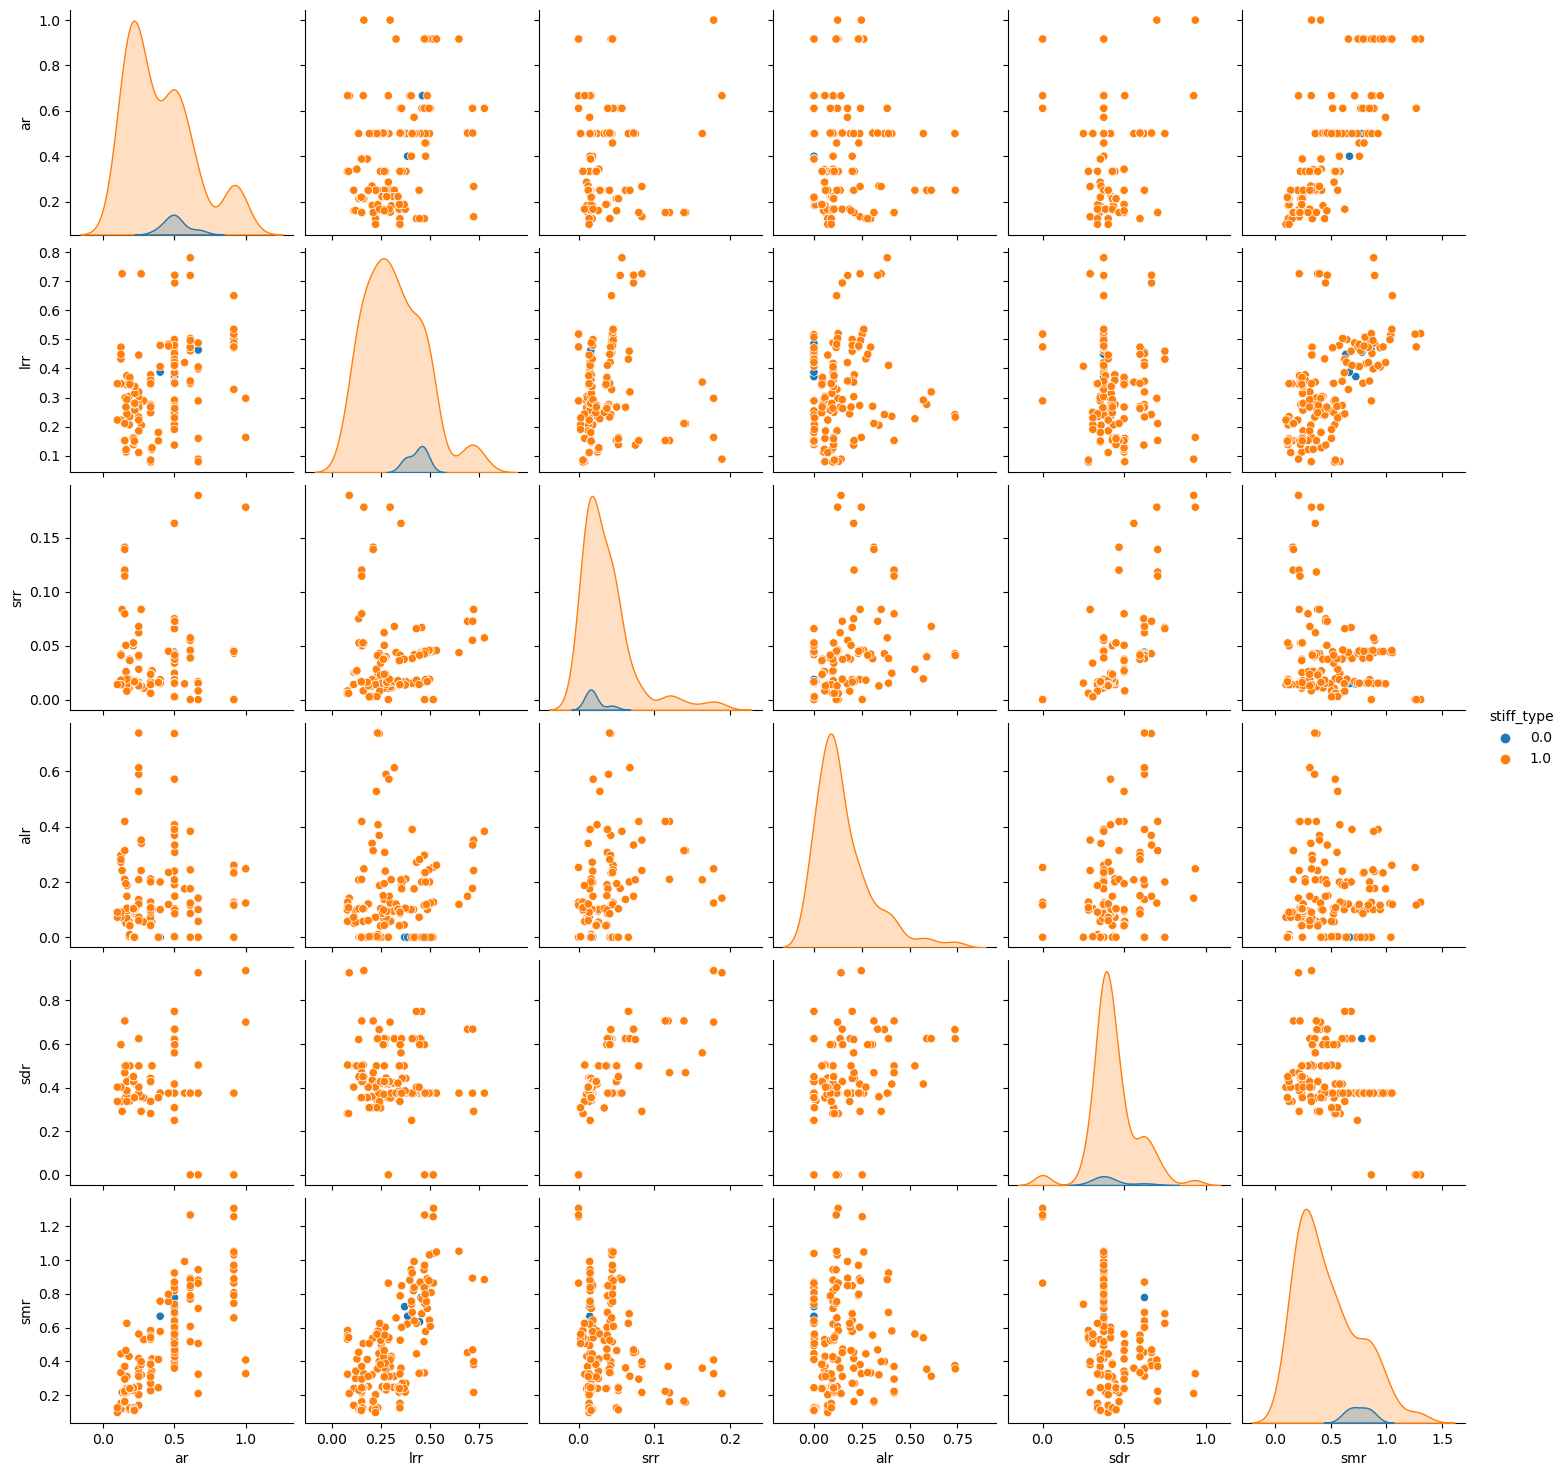

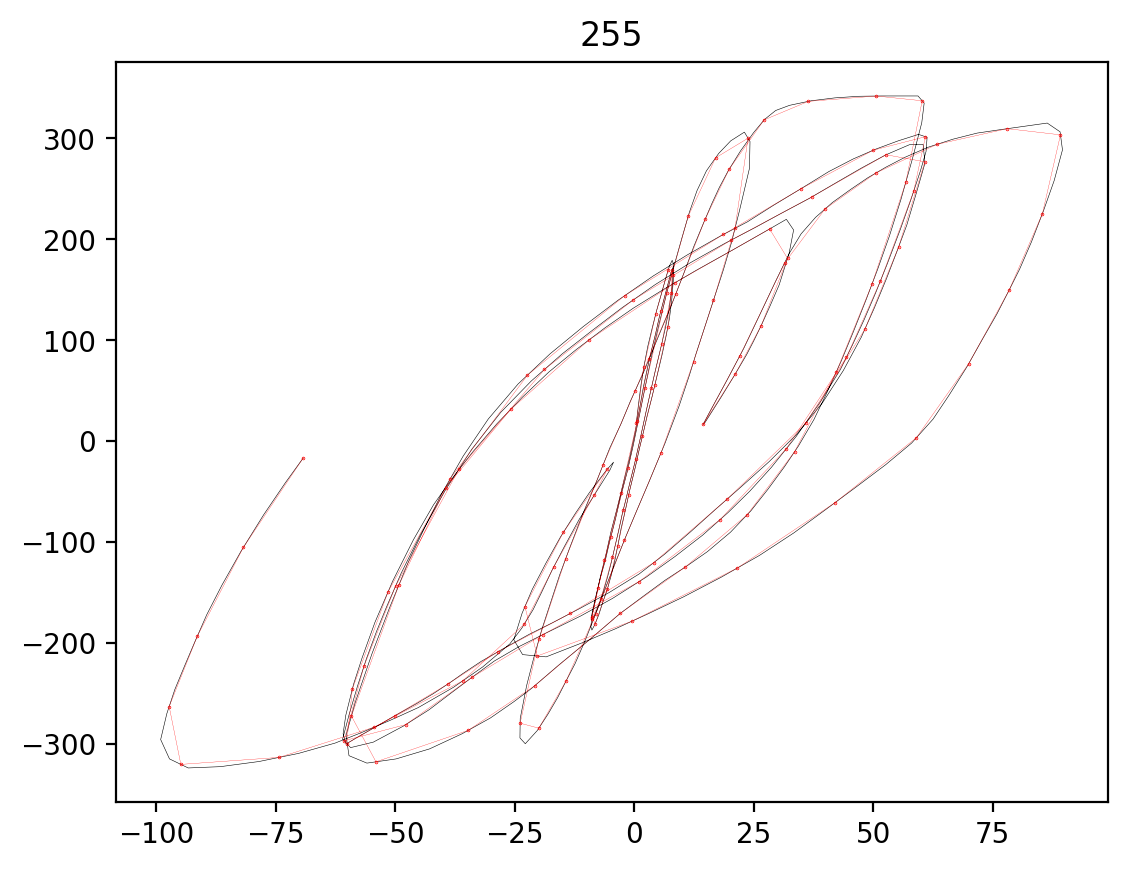

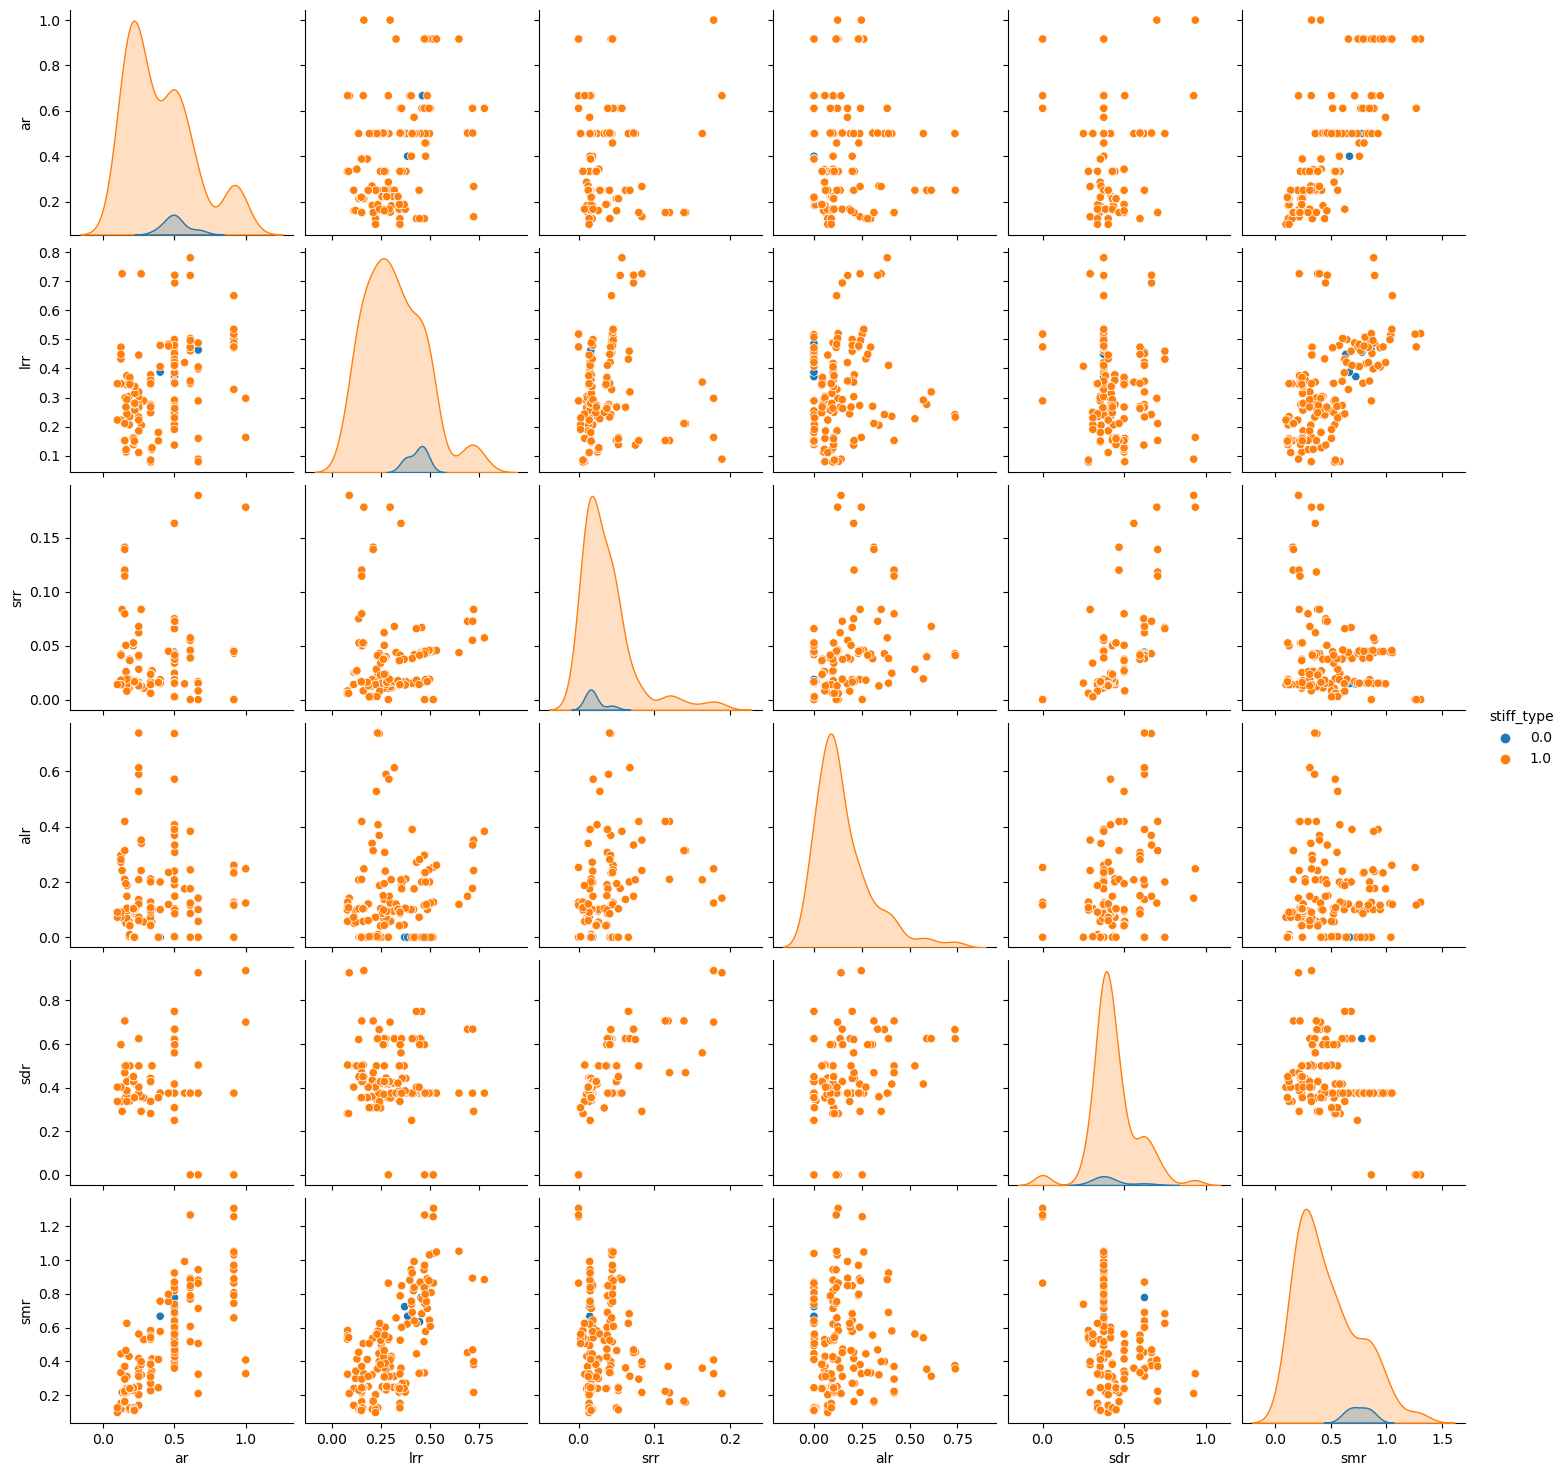

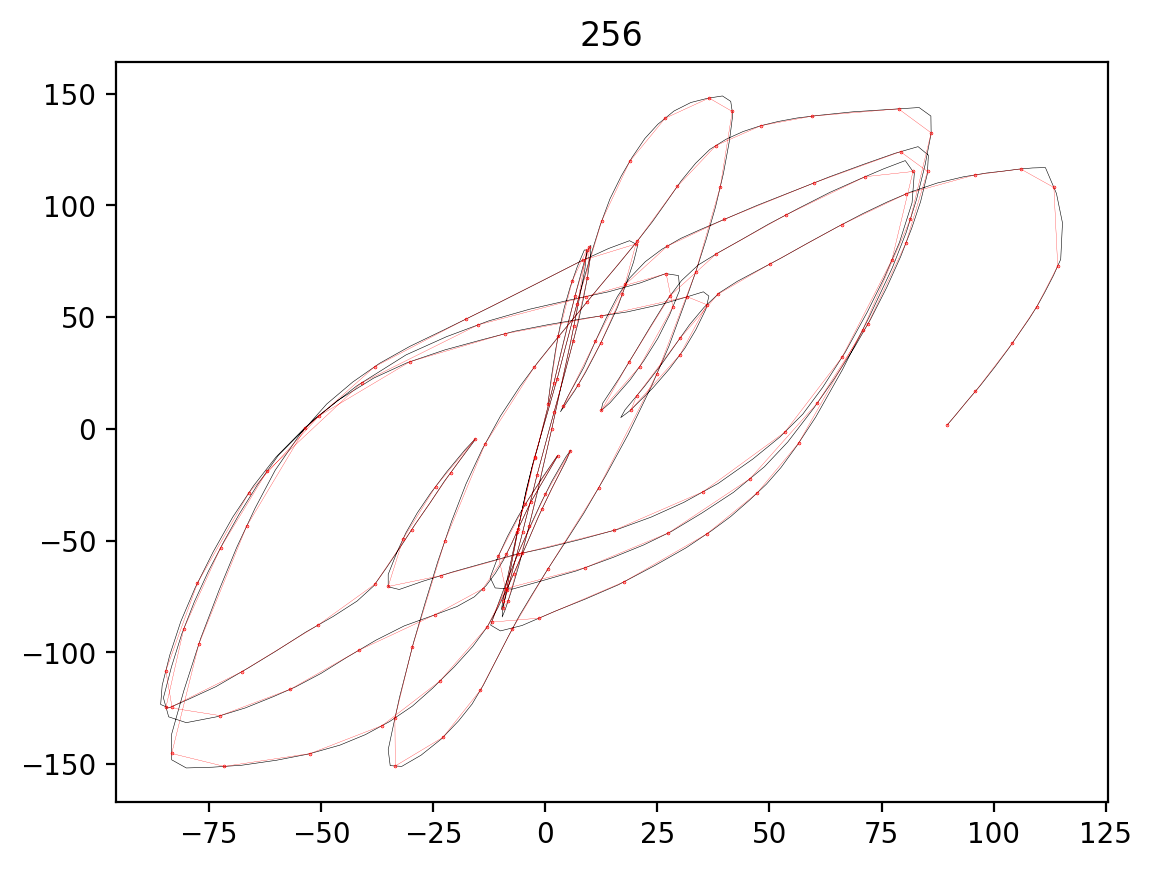

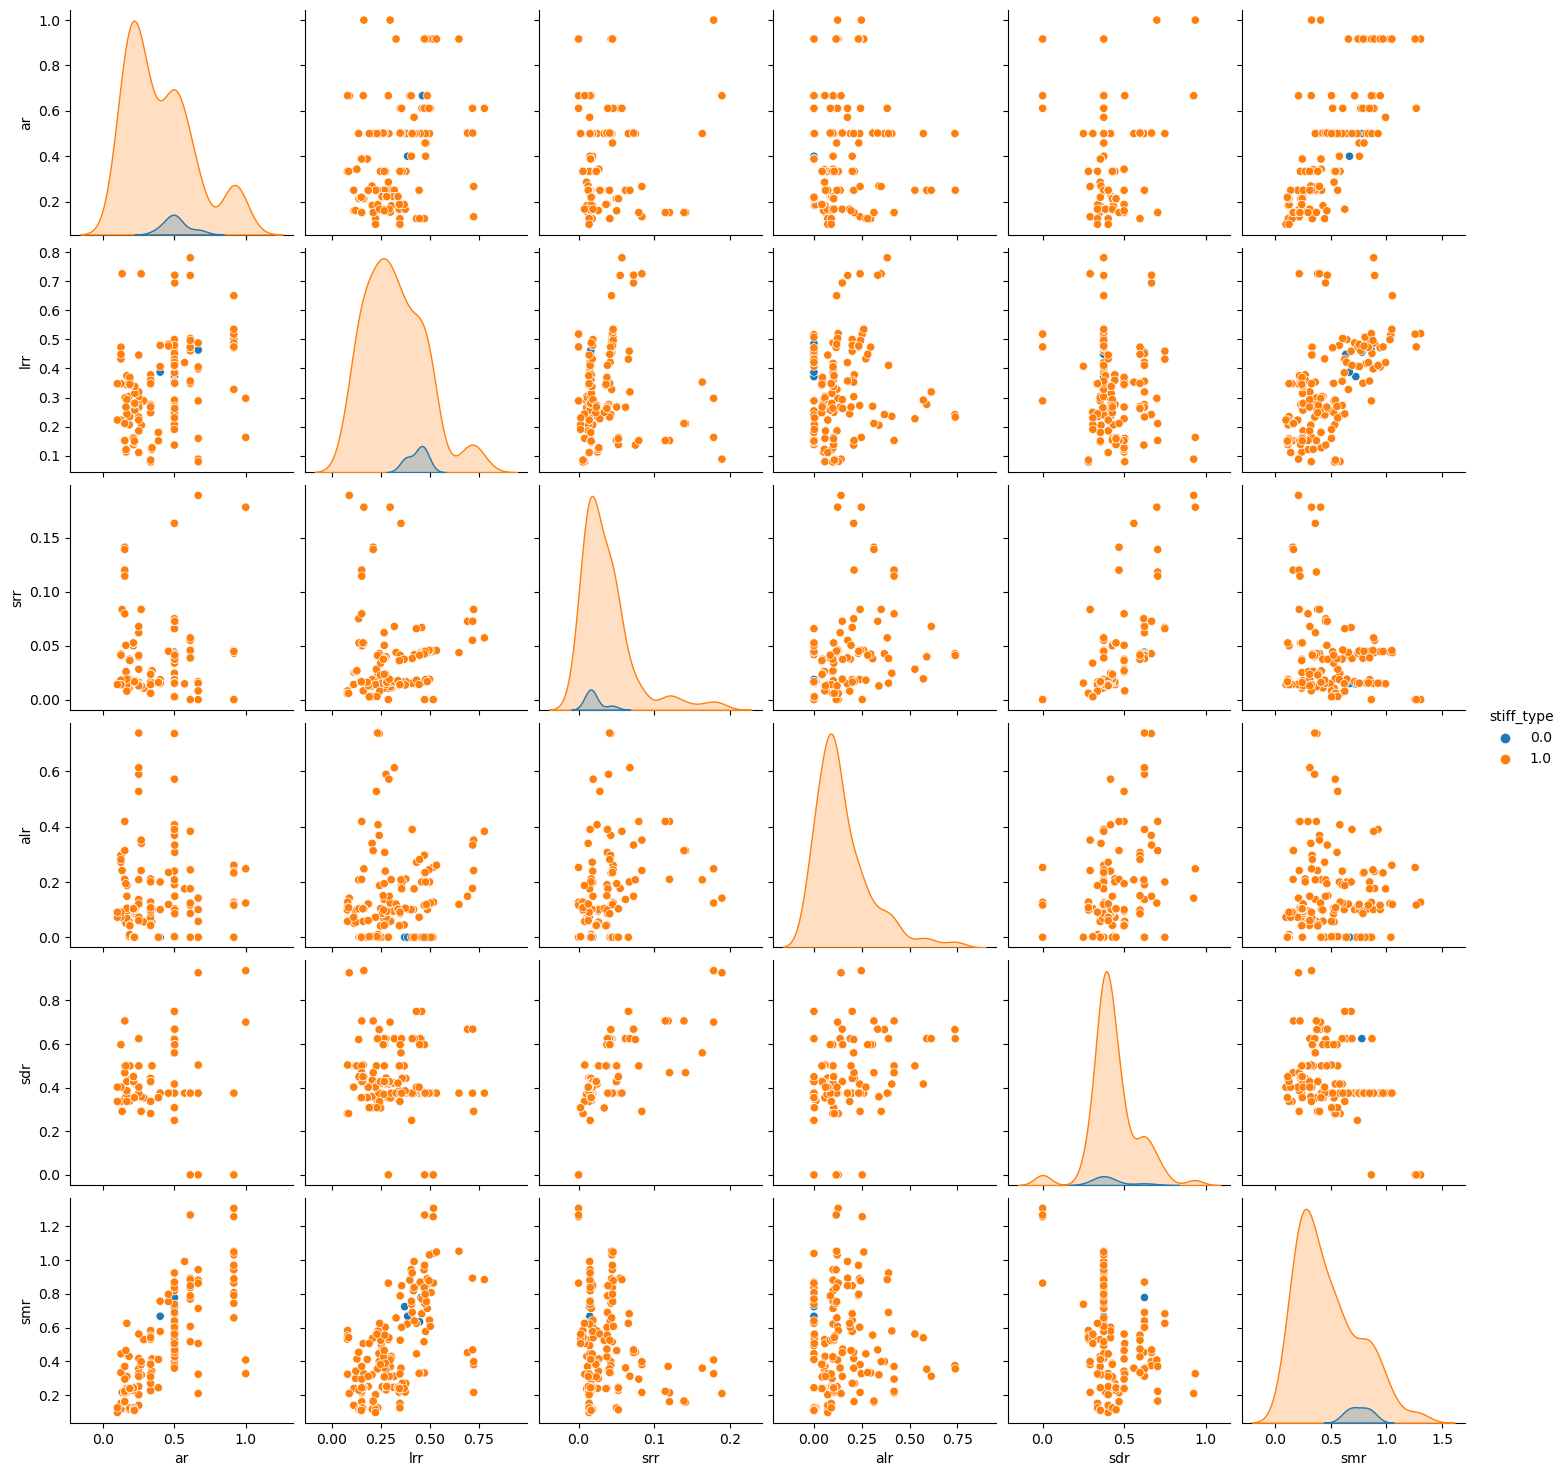

In [15]:
'''
This code plots the force-displacement relations for the concrete column
tests in the database
'''

# Get current folder
current_folder = os.getcwd()

# Folder with the JSON files
json_dir = current_folder + '/test_data/'
   
# Load the database
data = pd.read_csv('data_spiral_wnd.csv')
# print(data)
# For each curve:    
maxii = 3 #len(data)

for ii in range(0, maxii):
    
    # (1) Create name of file
    test_id = str(data.id[ii]).zfill(3)
    filename = json_dir + 'test_' + test_id + '.json'
    
    # (2) Import JSON file as dictionary
    test_data = load_json(filename)

    # (3) Check P-Delta, and get effecttive force if needed
    test_data['data'] = get_effective_force(test_data, False)
    
    # (4) Save the effective force-displacement curves in their separate files
    create_calibration_file(test_data, test_id, destination=json_dir, plot=False)
    
    # (5) Extract the nondimensional parameters from the csv file (last 6 columns)
    nondim_params = data.iloc[ii, -6::]
    print(nondim_params)

    # Add a column to data
    data['stiff_type'] = np.ones(len(data))

    cases = [267, 269, 270, 271, 272, 273]
    # For ids in cases, set the stiff_type to 0
    data.loc[data['id'].isin(cases), 'stiff_type'] = 0

    # Get last 7 values in data in a new dataframe
    nondim_params = data.iloc[:, -7::]
    
    # Create pairplot of the data withh hue='stiff_type'
    import seaborn as sns
    sns.pairplot(nondim_params, hue='stiff_type')

    # Note: cases are in the median of the distributions for all the possible parameters... Not too good.
    

    # 
    # (4) Get the elastic stiffness and substract elastic deformation
    # moment_rotation, elastic_stiffness = get_moment_rotation(test_data, plot=False)

    # (5) Get backbone curve
    # mr_backbone is the backbone of the moment-rotation
    # mr_backbone, yield_point, normalized_hyst = get_backbone_curve(moment_rotation, plot=True)
    
    # (6) Save the normalized hysteresis curve to a csv file

    # Create filename
    # filename = 'normalized_hysteresis/test_' + str(data.id[ii]).zfill(3) + '.csv'

    # Save the file
    #state = save_normalized_hysteresis(normalized_hyst, filename, npts=10)
    #if state == 0:
    #    print('Error saving file: ' + filename)
    #else:
    #    print('File saved: ' + filename)

    # To do:
    # Write the file with the nondimensional parameters
    # Write the file with the solver with quoFEM

    # df = pd.DataFrame(normalized_hyst)
    # print(df)
    # df.to_csv('normalized_hysteresis.csv', index=False)